# Digit recognition with *Convolution Neural Network*
We shall use:
- *Keras* *MNIST* data for digit recognition : https://keras.io/api/datasets/mnist/
- *Tensorflow*  https://www.tensorflow.org/  
- *keras* https://www.tensorflow.org/guide/keras

Dataset consists of $28\times 28$ grayscale images labeled with digits (0 through 9) 

Make sure that you change *Runtime* to ***GPU***.

## 1\. Import libraries

In [1]:
import numpy as np # for computation
import pandas as pd # for data handling and analysis
import matplotlib.pyplot as plt # for plotting

# metrics to evaluate models
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve

# import tensorFlow / keras for neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import plot_model # to display model

from keras.datasets import mnist # to import data for training and testing 

## 2\. Read data
We shall use the MNIST digits classification dataset using the *mnist.load_data()* utility (see https://keras.io/api/datasets/mnist/) into the following *Numpy* arrays:
- Training: input *x_train*, output *trainY*
- Test: input *x_test*, output *testY*

In [2]:
(x_train, trainY), (x_test, testY) = mnist.load_data()
print('%d training and %d test examples read' %(len(trainY), len(testY)))
print("Shape of arrays:")
print("\tTraining -> input x_train: %s, output trainY: %s" %(x_train.shape, trainY.shape))
print("\tTest -> input x_test: %s, output testY: %s" %(x_test.shape, testY.shape))

11493376/11490434 [==============================] - 0s 0us/step
60000 training and 10000 test examples read
Shape of arrays:
	Training -> input x_train: (60000, 28, 28), output trainY: (60000,)
	Test -> input x_test: (10000, 28, 28), output testY: (10000,)


# Function to transform inputs
We shall define a function to convert the 2D images into tensors with the required shape. We shall also normalize the data by mapping gray scale values (0-255) to a number between 0 and 1

In [3]:
def Xform(x):
    return x.reshape(-1, 28, 28, 1)/255.0

## 3\. Create Neural Network




### 3\.1 Function to create CNN with 4 convolution layers

We shall use *Tensorflow* and *Keras* to create a convolution neural network. 

The function ***CNN_4***(*W, H, nClasses, K1, K2, K3, K4, n, dropout_rate, kernel_size, pool_size*) returns a CNN with 4 convolution layers followed by a densely connected layer and an output layer with specified parameters, where:
- *W, H*: are the image width and height
- *nClasses*: is the number of output classes
- K1, K2, K3, K4: are the number of kernels (filters) in the 4 convolution layers
- *n*: in the number of neurons in the densely connected layer
- *dropout_rate*: specifies the dropout rate
- *kernel_size*: specifies the shape of the kernels
- *pool_size*: specifies the shape for max-pooling




In [4]:
def cnn4(W, H, nClasses,
         K1, K2, K3, K4, n,
         dropOutRate, 
         kernel_size, 
         pool_size):
  """network with 4 convolution layers and a dense layer
  K1, K2, K3, K4: number of filters in the 4 convoluttion layers
  n: number of neurons in dense layer 
  """ 
  model = Sequential()
  
  # Covolution layers
  model.add(Conv2D(K1, kernel_size, activation='relu', 
                  input_shape=(W, H, 1)))
  model.add(Conv2D(K2, kernel_size, activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropOutRate))
  
  model.add(Conv2D(K3, kernel_size, activation='relu')) 
  model.add(Conv2D(K4, kernel_size, activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size))
  model.add(Dropout(dropOutRate))

  # Dense layer
  model.add(Flatten())
  model.add(Dense(n, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(dropOutRate))
  
  # Output layer
  model.add(Dense(nClasses, activation='softmax'))
  # compile model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', 
                metrics=['accuracy'])
  modelName = 'CNN4.' + '.'.join([str(v) for v in [K1, K2, K3, K4, n]])
  print("Model: ", modelName)
  print(model.summary())
  plot_model(model,to_file=modelName + '.png') # save architecture
  return modelName, model

### 3\.2 Create model
Specify parameters and use function *cnn4* to create CNN model

In [5]:
# Specify parameters for model (change as needed)
W, H = 28, 28 # image shape
nClasses = 10 # number of classes
K1, K2, K3, K4, n = 16, 32, 64, 128, 256
dropOutRate = 0.2
kernel_size = (3,3) 
pool_size = (2,2)

modelName, model = cnn4(W, H, nClasses,
                        K1, K2, K3, K4, n,
                        dropOutRate, kernel_size, pool_size)

Model:  CNN4.16.32.64.128.256
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)         

## 4\. Train model

We shall train the model over a number of epochs and in batches of specified sizes. A subset of the training examples will be held back for validation and the best model with respect to the validation examples will be saved.  

In [6]:
epochs = 10 # number of training epochs
batch_size = 512 # batch_size for training 

history = model.fit(Xform(x_train), to_categorical(trainY),
                    epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
106/106 [==============================] - 3s 24ms/step - loss: 0.3068 - accuracy: 0.9047 - val_loss: 1.7786 - val_accuracy: 0.2948
Epoch 2/10
106/106 [==============================] - 2s 21ms/step - loss: 0.0873 - accuracy: 0.9739 - val_loss: 1.5729 - val_accuracy: 0.3938
Epoch 3/10
106/106 [==============================] - 2s 21ms/step - loss: 0.0630 - accuracy: 0.9812 - val_loss: 0.8024 - val_accuracy: 0.7593
Epoch 4/10
106/106 [==============================] - 2s 21ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.2032 - val_accuracy: 0.9620
Epoch 5/10
106/106 [==============================] - 2s 21ms/step - loss: 0.0460 - accuracy: 0.9856 - val_loss: 0.0670 - val_accuracy: 0.9830
Epoch 6/10
106/106 [==============================] - 2s 21ms/step - loss: 0.0386 - accuracy: 0.9882 - val_loss: 0.0422 - val_accuracy: 0.9880
Epoch 7/10
106/106 [==============================] - 2s 21ms/step - loss: 0.0358 - accuracy: 0.9889 - val_loss: 0.0311 - val_accuracy: 0.9912

### 4\.1 Plot history
Check for over-fitting

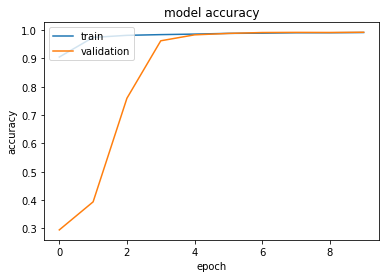

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 5\. Evaluate best trained model

### 5\.1 Predict classes and probabilities for test examples

In [8]:
pred_prob = model.predict(Xform(x_test)) # predicted probabilities
pred_test = pred_prob.argmax(axis=1) # predicted labels
print("Predicted probabilities: %d rows and %d columns" %pred_prob.shape)
print("Number of examples predicted: %d" %len(pred_test))

Predicted probabilities: 10000 rows and 10 columns
Number of examples predicted: 10000


Check what the predicted probabilities and predicted classes look like

In [9]:
n_ex = 5 # show the first n_ex examples
print('Probabilities,', 'Predicted class')
for i in range(n_ex):
    print(pred_prob[i].round(2), pred_test[i])

Probabilities, Predicted class
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] 2
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] 1
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4


### 5\.2 Evaluate predictions

In [10]:
acc = accuracy_score(testY, pred_test)
print("Test accuracy = %4.4f" %acc)
print(classification_report(testY, pred_test, digits=4))

Test accuracy = 0.9932
              precision    recall  f1-score   support

           0     0.9929    0.9959    0.9944       980
           1     0.9921    0.9991    0.9956      1135
           2     0.9951    0.9922    0.9937      1032
           3     0.9921    0.9970    0.9946      1010
           4     0.9929    0.9939    0.9934       982
           5     0.9921    0.9910    0.9916       892
           6     0.9937    0.9916    0.9927       958
           7     0.9893    0.9903    0.9898      1028
           8     0.9979    0.9928    0.9954       974
           9     0.9940    0.9871    0.9906      1009

    accuracy                         0.9932     10000
   macro avg     0.9932    0.9931    0.9932     10000
weighted avg     0.9932    0.9932    0.9932     10000



## 6\. Other stuff

Function to display digits

In [11]:
def displayDigits(images, labels, nCols=10):
    """Displays images with labels (nCols per row)
    - images: list of vectors with 784 (28x28) grayscale values
    - labels: list of labels for images"""
    nRows = np.ceil(len(labels)/nCols).astype('int') # number of rows
    plt.figure(figsize=(2*nCols,2*nRows)) # figure size
    for i in range(len(labels)):
        plt.subplot(nRows,nCols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], interpolation='nearest')
        plt.xlabel(str(labels[i]), fontsize=14)
    plt.show()
    return

Display misclassified digits

68 (0.68%)images misclassifieded
Labels displayed as '(true, predicted, confidence)'


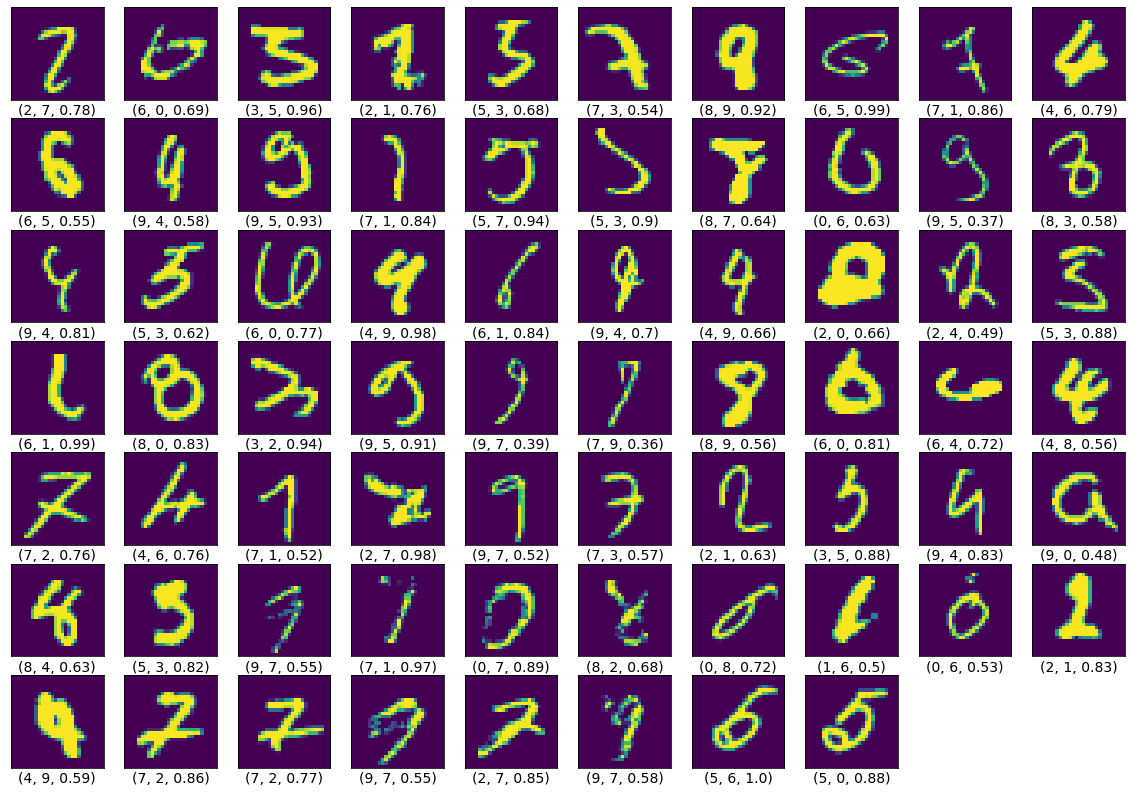

In [12]:
misclassified = [i for i in range(len(testY)) if testY[i] != pred_test[i]] # indices of misclassified test examples
images = [x_test[i] for i in misclassified] # pixel vectors for examples
labels = [(testY[i], pred_test[i], max(pred_prob[i]).round(2)) for i in misclassified] # labeled digits for examples
nE = len(misclassified) # number of errors
print('%d (%4.2f%%)images misclassifieded' %(nE, 100*nE/len(testY)))
print("Labels displayed as '(true, predicted, confidence)'")
displayDigits(images, labels, 10)

Use trained model to recognize your own handwitten digits

In [15]:
# https://gist.github.com/korakot/8409b3feec20f159d8a50b0a811d3bca

from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode
import PIL

canvas_html = """
<canvas width=%d height=%d style="border:1px solid #000000;"></canvas>
<button>Predict digit</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})
</script>
"""
def predictImage(infile, model):
    img = PIL.Image.open(infile).resize((20,20))
    img = np.array(img).mean(axis=2)
    m = img.max()
    img = img*255/m
    a = np.zeros((28,28))
    a[4:4+20,4:4+20] = img
    x = np.array([a]).reshape((1,28,28,1))/255.0
    p = model.predict(x)
    conf = p.max()
    digit = p.argmax(axis=1)[0]
    print("Predicted digit: %d, (confidence = %4.3f)"  %(digit, conf))
    return

def draw(filename='digit.png', w=200, h=200, line_width=20):
    print("Draw a digit in the box below and click the 'Predict digit' button")
    display(HTML(canvas_html % (w, h, line_width)))
    data = eval_js("data")
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return predictImage(filename, model)

Run the next cell, draw a digit, and click on "Predict digit"

In [16]:
draw()

Draw a digit in the box below and click the 'Predict digit' button


Predicted digit: 3, (confidence = 0.999)
